# Part I - Ford GoBike System Data Exploration
## by Zainab Akanji

## Introduction
This dataset includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#stop warnings from showing throughout the code
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bike_data.shape

(183412, 16)

In [5]:
#checking the structure of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#check for duplicates
sum(bike_data.duplicated())

0

In [7]:
#check for missing values
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Assessment
Before going into exploration, there are some data issues that needs to be assessed and cleaned
### Quality and Tidiness issues
1. start_time column contains both date and time and in string format.

2. end_time column contains both date and time and in string format.

3. start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender contain missing values.

4. start_station_id, end_station_id in float type.

5. bike_id in int type.

6. member_birth_year in float type.

## Data Cleaning
   I will make a copy of the dataset for cleaning the identified issues

In [8]:
bike_copy = bike_data.copy()

#### Define
Drop rows with missing values

#### Code

In [9]:
bike_copy.dropna(axis=0,inplace=True)

#### Test

In [10]:
bike_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Define
Convert start_time and end_time columns to datetime format.

#### Code

In [11]:
bike_copy['start_time'] = pd.to_datetime(bike_copy['start_time'])
bike_copy['end_time'] = pd.to_datetime(bike_copy['end_time'])

#### Test

In [12]:
bike_copy[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

#### Define
Convert start_station_id, end_station_id and bike_id to string type

#### Code

In [13]:
bike_copy.start_station_id = bike_copy.start_station_id.astype('str')
bike_copy.end_station_id = bike_copy.end_station_id.astype('str')
bike_copy.bike_id = bike_copy.bike_id.astype('str')

#### Test

In [14]:
bike_copy[['start_station_id', 'end_station_id', 'bike_id']].dtypes

start_station_id    object
end_station_id      object
bike_id             object
dtype: object

#### Define
Change member_birth_year to string type and remove the .0 at the end

#### Code

In [15]:
bike_copy.member_birth_year = bike_copy.member_birth_year.astype(str).str[:-2]

#### Test

In [16]:
bike_copy.member_birth_year.tail()

183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, dtype: object

In [17]:
bike_copy.member_birth_year.value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
1985     7023
1984     6557
1983     5953
1980     5011
1982     4987
1996     4637
1981     4344
1979     3756
1997     3476
1998     3208
1978     2830
1977     2706
1974     2633
1999     2504
1975     2503
1976     2435
1973     2080
1968     1927
1971     1924
1972     1909
        ...  
1954      301
1952      189
1951      180
1950      178
1953      158
1947      135
1955      134
1945      105
1949       99
1931       89
1900       53
1948       51
2001       34
1943       30
1942       21
1933       20
1946       19
1939       11
1902       11
1941        9
1901        6
1938        3
1920        3
1944        2
1934        2
1928        1
1927        1
1930        1
1878        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [18]:
#drop the birth year of 1878..could be an outlier
bike_copy.drop(bike_copy[(bike_copy.member_birth_year == 1878  )].index, inplace = True)

In [19]:
bike_copy.shape

(174952, 16)

In [20]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usag

### What is the structure of your dataset?

There are 174952 bike observations in the dataset with 16 features. Some variables are numeric in nature, but user_type and member_gender are qualitative in nature.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are duration_sec, start_time, end_time, user_type, member_birth_year and member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the bike_share_for_all_trip feature would support the investigation into features of interest.

## Univariate Exploration
I will explore the distribution of individual variables of interest.

#### Question
What is the distribution of duration?

Before answering this question, i would convert the duration in seconds to minutes for better interpretation.

In [21]:
bike_copy['duration_min'] = bike_copy.duration_sec / 60

In [22]:
bike_copy.duration_min.head()

0     869.750000
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
Name: duration_min, dtype: float64

I would use a histogram to check the distribution since it is a Quantitative variable.

#### Visualization

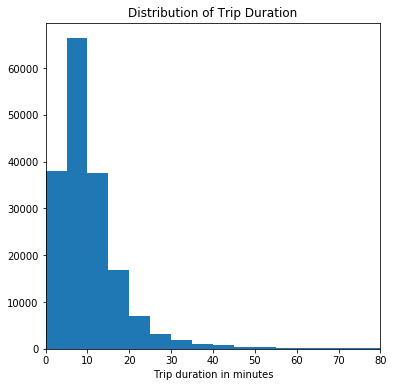

In [23]:
plt.figure(figsize=[6,6])
bins = np.arange(0, bike_copy['duration_min'].max()+ 5, 5)
plt.hist(data=bike_copy, x='duration_min', bins=bins)
plt.xlabel('Trip duration in minutes')
plt.title('Distribution of Trip Duration')
#setting limits between 0 and 80 because all points fell within this range.
plt.xlim(0,80);

#### Observation
Most bike trips were between 0 to 15 minutes with peak at 10 minutes. This could be due to short distances taken between the respective start and end stations

I will create a function for creating a countplot for the qualitative univariate variables of interest.

In [24]:
#define a function for creating countplot
def aCountPlot(bike_copy,x,color=sb.color_palette()[0],order=None):
    '''This function plots the counts of the x-variable'''
    #set plot dimensions
    plt.figure(figsize=[14,6])
    #plot
    sb.countplot(data=bike_copy, x=x, edgecolor='black', color=color, order=order);
    #after plotting, clean up variable name
    x=x.replace("_"," ")#replace _ with a space
    #add title and format it
    plt.title(f'''Distribution of {x}'''.title(), fontsize=14, weight='bold')
    #add xlabel and format it
    plt.xlabel(x.title(), fontsize=10, weight='bold')
    #add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

#### Question
Are there more Subscribers than Customers or vice versa?

I would use seaborn's countplot function to visualize this question since user_type is a qualitative variable

#### Visualizaton

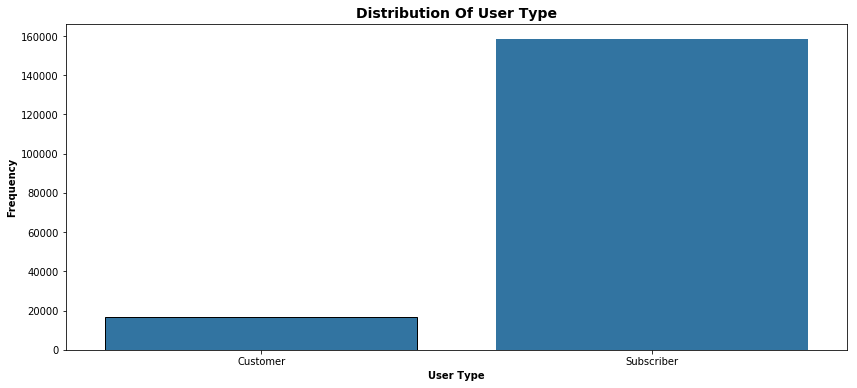

In [25]:
#call plot function
aCountPlot(bike_copy, 'user_type')

#### Observation
Most users are subscribers.

#### Question
Which gender uses bike trips the most?

#### Visualization

I would check the relative frequency of the gender.

In [26]:
gender_counts = bike_copy['member_gender'].value_counts()
n_counts = bike_copy['member_gender'].value_counts().sum()
max_counts = gender_counts[0]
max_counts

130500

In [27]:
order = gender_counts.index
order

Index(['Male', 'Female', 'Other'], dtype='object')

In [28]:
#getting the proportions
max_prop = max_counts/n_counts
base_color = sb.color_palette()[2]
ticks=np.arange(0, max_prop, 0.1)
tick_name = [ '{:0.1f}'.format(v) for v in ticks]

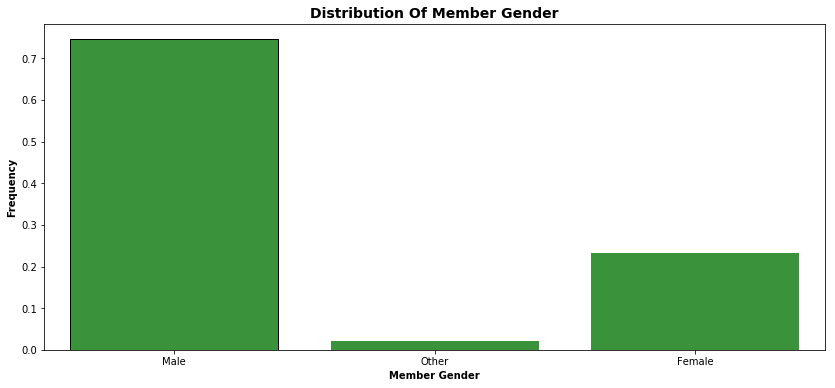

In [29]:
#call plot function
aCountPlot(bike_copy, 'member_gender', color=base_color)
plt.yticks(ticks*n_counts, tick_name);

#### Observation
75% of bike users are males, 20% are females and less than 5% are of the other gender

#### Question
What is the distribution of user age?

Prior to visualization, I would create a new column containing the current ages of users by subtracting the year of birth from the year the dataset was collected(2019).

In [30]:
bike_copy.member_birth_year = bike_copy.member_birth_year.astype('int')

In [31]:
bike_copy['age'] = 2019 - bike_copy['member_birth_year']
bike_copy.age.head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

#### Visualization

I would use a histogram because its a quantitative variable

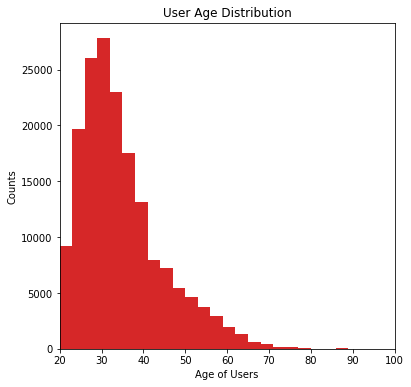

In [32]:
plt.figure(figsize=[6,6])
base_color = sb.color_palette()[3]
bins = np.arange(20, bike_copy['age'].max()+ 3, 3)
plt.hist(data=bike_copy, x='age', bins=bins, color = base_color)
plt.xlabel('Age of Users')
plt.ylabel('Counts')
plt.title('User Age Distribution')
plt.xlim(20,100);

There was a point on the 120 mark which i considered to be an outlier, therefore i set the limits between 20 and 100.

#### Observation
Most bike users are between the ages of 25 and 40 years with peak age at 30 years.
There are few points between 90 and 100 years which may be considered as outliers.

#### Question
What hour(s) of the day are most trips taken?

In [33]:
bike_copy['trip_month'] = bike_copy['start_time'].dt.month_name()
bike_copy.trip_month.value_counts()

February    174952
Name: trip_month, dtype: int64

This dataset contains bike trips taken in February only. So I will find out what day of the week and hour of the day has the most trips.

In [34]:
#Extract day of the week from start_time column
bike_copy['trip_day'] = bike_copy['start_time'].dt.day_name()
bike_copy.trip_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: trip_day, dtype: int64

In [35]:
#Extract hour of the day from start_time column
bike_copy['trip_hour'] = bike_copy['start_time'].dt.hour
bike_copy.trip_hour.head()

0    17
2    12
3    17
4    23
5    23
Name: trip_hour, dtype: int64

#### Visualization

In [36]:
#Rearrange the trip hours
hour_trips = range(0,23)
hour_category = pd.api.types.CategoricalDtype(ordered=True, categories=hour_trips)
bike_copy['trip_hour'] = bike_copy.trip_hour.astype(hour_category)

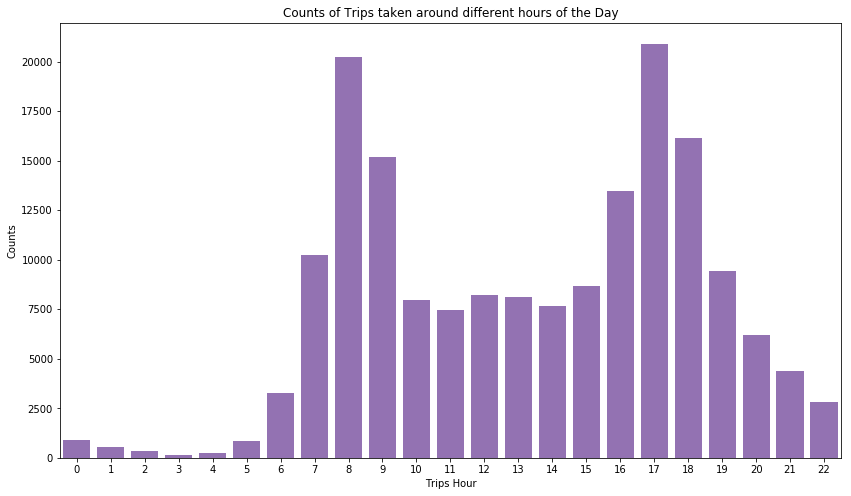

In [37]:
plt.figure(figsize=[14,8])
base_color = sb.color_palette()[4]
sb.countplot(data=bike_copy, x='trip_hour', color=base_color)
plt.ylabel('Counts')
plt.xlabel('Trips Hour')
plt.title('Counts of Trips taken around different hours of the Day');

#### Observation
The highest number of trips are taken by 8am and 5pm daily. This corresponds to the beginning and end of work hours respectively. A large number of users could be office workers.

#### Question
What day of the week are most trips taken?

#### Visualization

In [38]:
#Rearrange the trip days
day_trips = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_category = pd.api.types.CategoricalDtype(ordered=True, categories=day_trips)
bike_copy['trip_day'] = bike_copy.trip_day.astype(day_category)

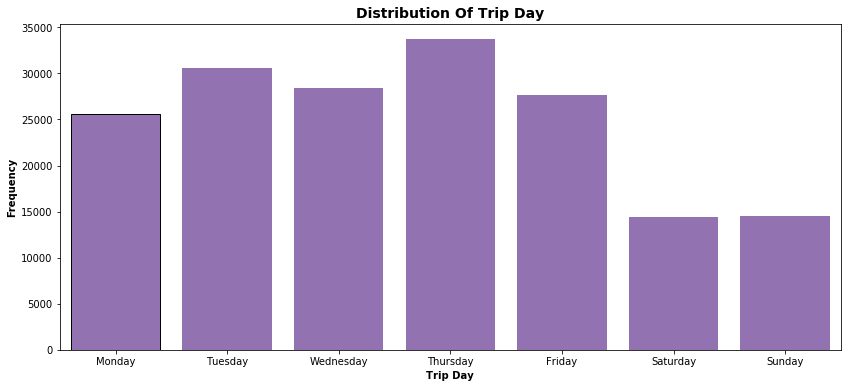

In [39]:
#call plot function
aCountPlot(bike_copy, 'trip_day', color = sb.color_palette()[4])

#### Observation
The highest number of trips are taken on Thursdays

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For the distribution of trip durations, I set the xlimits between 0 and 80 because all the data point were found between this range. There were no outlliers present here.
  For the user age distribution, I considered values greater than 80 to be outliers although I had removed a birth year of 1878 from the data in the preliminary wrangling phase. I did not need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
 For the distribution of duration of trips, I converted the duration in seconds to minutes for easy plotting and interpretability.
 To get user ages, I subtracted the birth year from the year the data was collected(2019).
 To be able to know the weekdays and trips taken at different hours of the day, I used pandas to extract this information from the start_time column.

## Bivariate Exploration

I will start with looking at the relationship between user age and trip duration. Before this, i would create a new dataframe called bike_clean containing ages less than and equal to 80. Ages greater than 80 are considered as outliers.

#### Question
What is the relationship between user age and duration of trips?

#### Visualization

In [40]:
bike_clean = bike_copy.query('age <= 80')
bike_clean.age.head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

Setting the range of duration to less than and equal to 80 minutes to avoid clumping of points and creating a new dataframe called bike_cleaned.

In [41]:
bike_cleaned = bike_clean.query('duration_min <= 80')
bike_cleaned.duration_min.head()

4    26.416667
5    29.883333
6    19.116667
7    26.916667
8    26.166667
Name: duration_min, dtype: float64

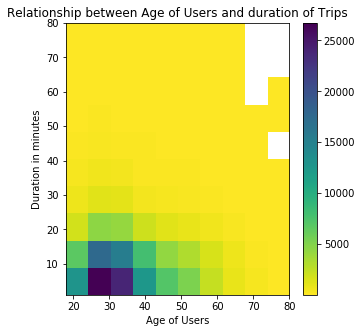

In [42]:
plt.figure(figsize=[5,5])
bins = np.arange(20, bike_cleaned['age'].max()+ 3, 3)
#setting the color map so that it goes from light to dark
plt.hist2d(data=bike_cleaned, x='age', y='duration_min', cmin = 0.5, cmap='viridis_r')
plt.colorbar()
plt.ylabel('Duration in minutes')
plt.xlabel('Age of Users')
plt.title('Relationship between Age of Users and duration of Trips');

#### Observation
Users between the age 25 and 35 years take the most trips that are less than 20 minutes.
Elderly users take trips that are not more than 50 minutes.

I want to know whether there are more trips during the weekday or weekends.

#### Question
Are there more trips during the weekdays or weekends or vice versa?

I would use seaborn's barplot to check the mean distribution of durations across all days of the week. 

#### Visualization

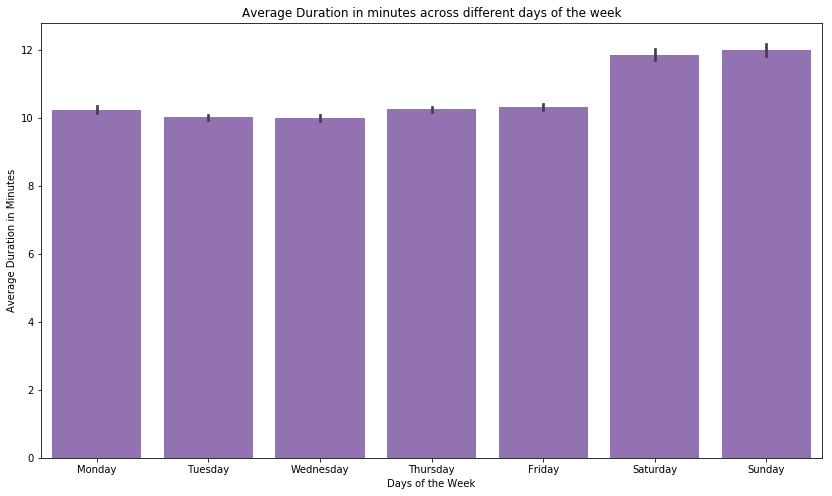

In [43]:
#plotting
plt.figure(figsize=[14,8])
base_color = sb.color_palette()[4]
sb.barplot(data=bike_cleaned, x='trip_day', y='duration_min', color=base_color)
plt.ylabel('Average Duration in Minutes')
plt.xlabel('Days of the Week')
plt.title('Average Duration in minutes across different days of the week');

#### Observation
Users tend to take trips more during the weekend with an average of 12 minutes. This could be because they have more leisure time.

Then I would inquire if a particular gender takes more trips than the rest.

#### Question
Which gender tend to take longer trips?

#### Visualization

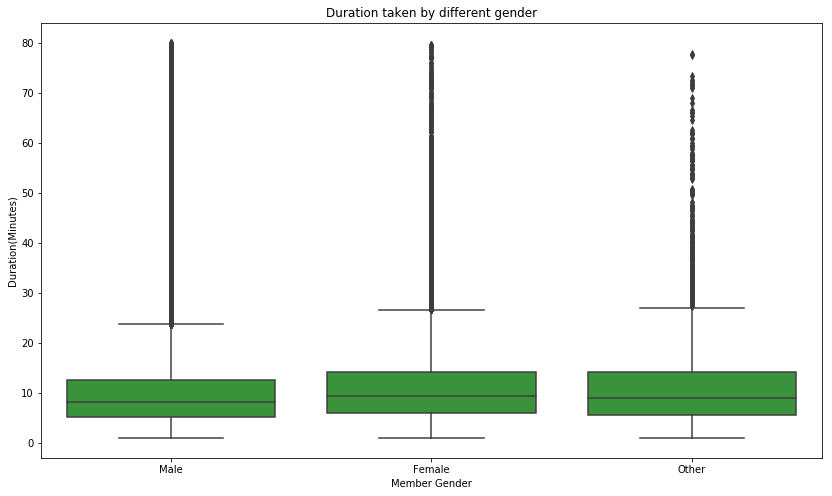

In [44]:
plt.figure(figsize=[14,8])
base_color = sb.color_palette()[2]
sb.boxplot(data=bike_cleaned, x='member_gender', y='duration_min', color=base_color)
plt.ylabel('Duration(Minutes)')
plt.xlabel('Member Gender')
plt.title('Duration taken by different gender');

#### Observation
Although there is a little difference, females tend to take longer bike trips. 

#### Question
Do male, female and the other gender ride on different days of the week?

#### Visualization

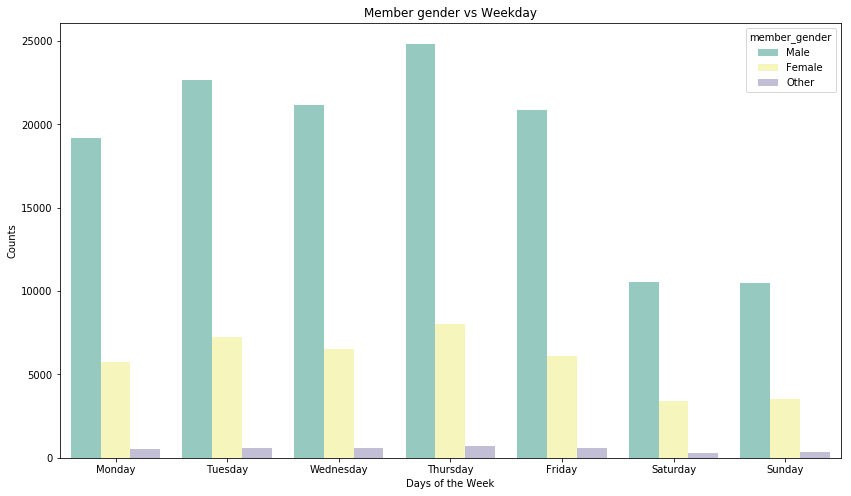

In [45]:
plt.figure(figsize=[14,8])
sb.countplot(data = bike_cleaned, x = 'trip_day', hue = 'member_gender', palette = 'Set3')
plt.ylabel('Counts')
plt.xlabel('Days of the Week')
plt.title('Member gender vs Weekday');

#### Observation
Ride trips on different days of the week is the same regardless of gender.

Then I would inquire if bike trips are the same between the two user types.

#### Question
Which type of users take longer bike trips?

#### Visualization

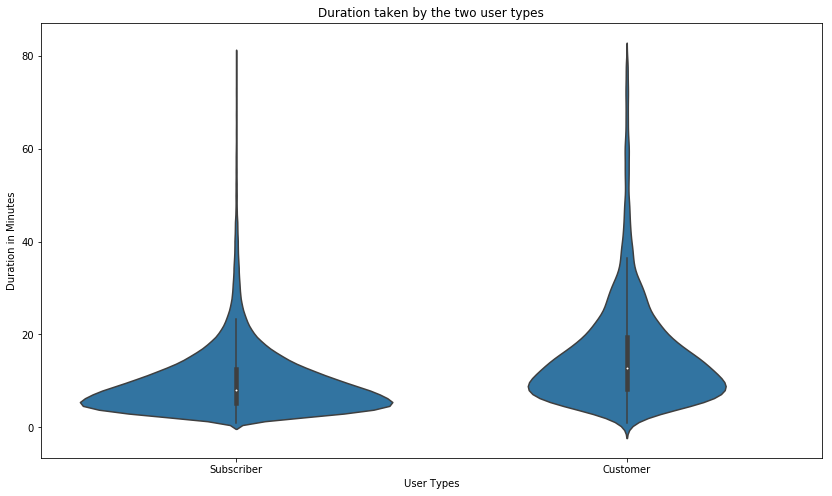

In [46]:
plt.figure(figsize=[14,8])
base_color = sb.color_palette()[0]
sb.violinplot(data=bike_cleaned, x='user_type', y='duration_min', color=base_color)
plt.ylabel('Duration in Minutes')
plt.xlabel('User Types')
plt.title('Duration taken by the two user types');

#### Observation
Although there are more subscribers than customers generally, customers tend to take longer bike trips.

#### Question
What day of the week do different user types take the longest bike trips?

#### Visualization

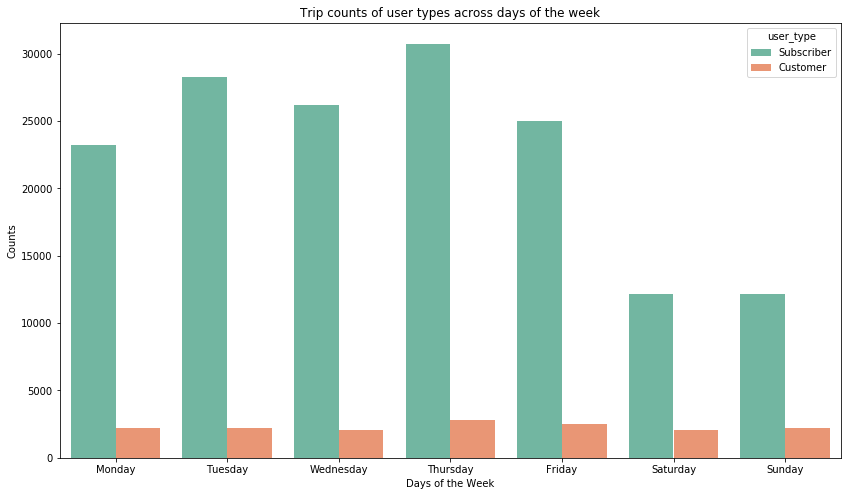

In [47]:
plt.figure(figsize=[14,8])
sb.countplot(data = bike_cleaned, x = 'trip_day', hue = 'user_type', palette = 'Set2')
plt.ylabel('Counts')
plt.xlabel('Days of the Week')
plt.title('Trip counts of user types across days of the week');

#### Observation
Subscribers have their highest trips on Thursdays while customers take more trips from Thursdays to Sundays. 

#### Question
Which user type are in the special membership program?

#### Visualization

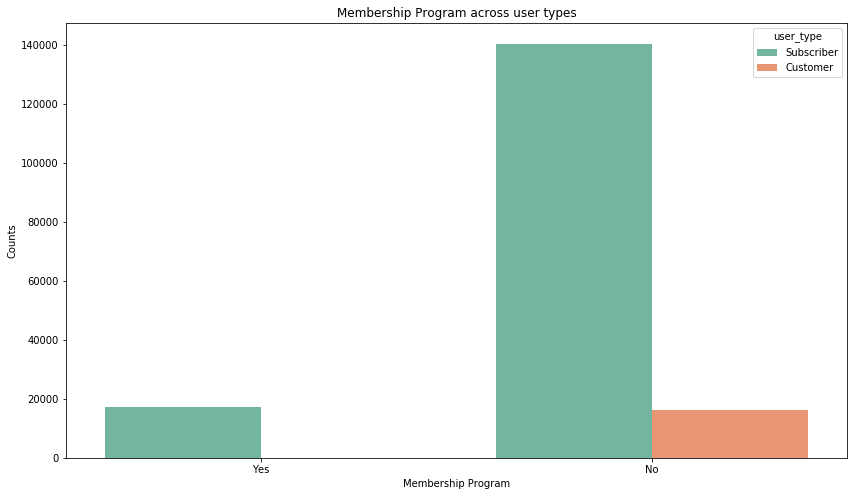

In [48]:
plt.figure(figsize=[14,8])
sb.countplot(data = bike_cleaned, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Set2')
plt.ylabel('Counts')
plt.xlabel('Membership Program')
plt.title('Membership Program across user types');

#### Observation
The special membership program is targeted to only subscribers but there are a lot of subscribers who are not members of the program.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are more trips during the weekends than weekdays irrespective of gender. Although there are more subscribers than customers, customers take longer trips as opposed to subscribers. Females take longer bike durations and customers take most of their trips on weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The special membership program are only designed for subscribers.

## Multivariate Exploration

Could there be a correlation between user age, duration and gender?

#### Question
Is there a relationship between age, duration and gender?

#### Visualization

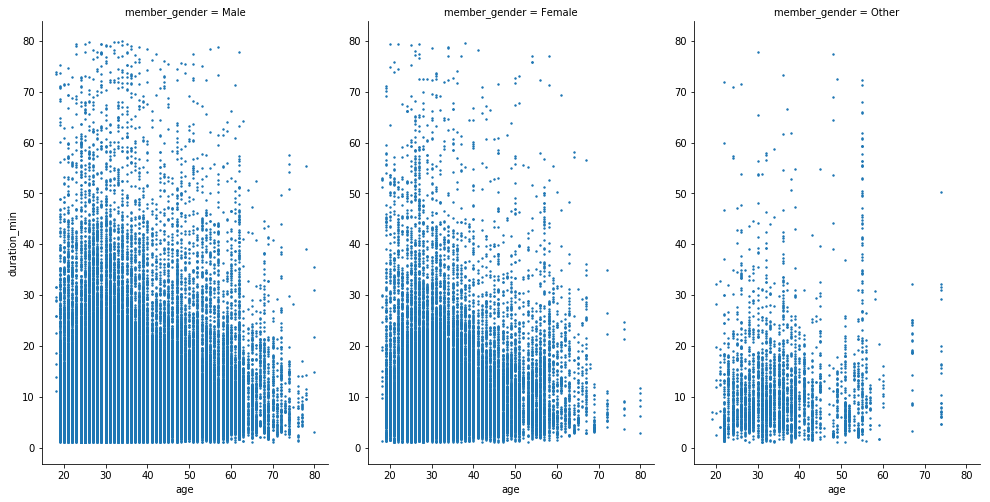

In [49]:
g= sb.FacetGrid(data = bike_cleaned, col='member_gender', size =4)
g.map_dataframe(plt.scatter, 'age', 'duration_min', s=2)
g.fig.set_size_inches(14,8);

#### Observation
There is no significant relationship between age, bike duration and gender.

#### Question
How long do the user types of different gender take trips?

#### Visualization

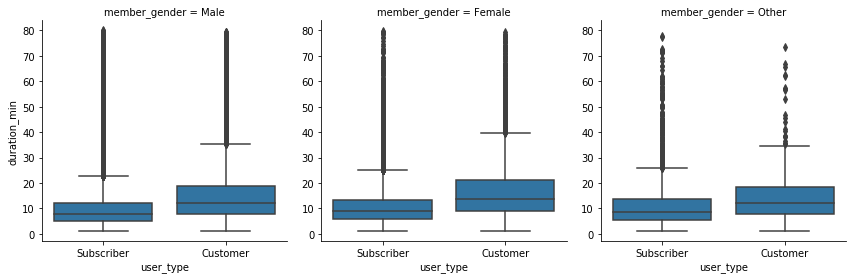

In [50]:
g = sb.FacetGrid(data=bike_cleaned, col='member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'duration_min');

#### Observation
Customers take more trips than Subscribers with Female customers taking the longest of trips.

Next, I want to know what time of the day the different gender and two user types  take their most trips.

#### Question
What is the distribution of bike trips of subscribers and customers of different gender?

#### Visualization

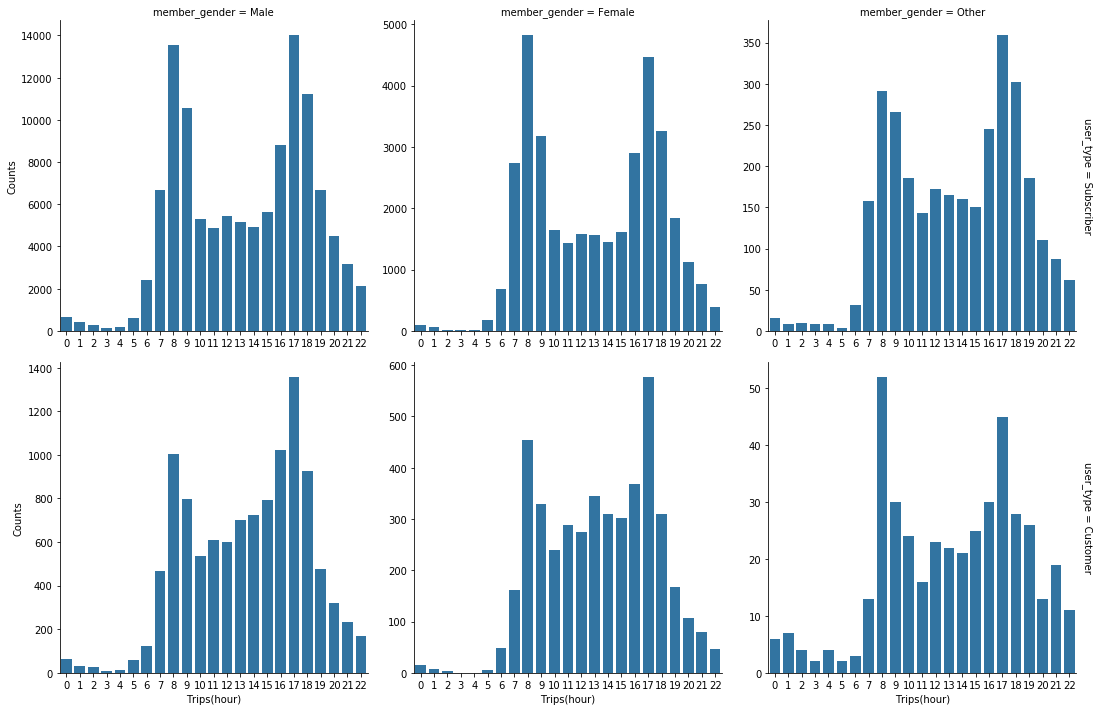

In [51]:
g = sb.FacetGrid(data = bike_cleaned, col = 'member_gender', row = 'user_type', size = 5,
                margin_titles = True, sharey=False)
g.map(sb.countplot, 'trip_hour')
g.set_xlabels('Trips(hour)')
g.set_ylabels('Counts');

#### Observation
Male and Female Subscribers are most active by the beginning and end of work hours(i.e 8a.m and 5p.m) while male and female customers take their most trips between 7a.m and 10p.m since customers tend to ride mostly on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Duration of trips is irrespective of age and gender.
Female customers take the longest of trips since they ride mostly on weekends.

### Were there any interesting or surprising interactions between features?

I found it interesting that female customers tool the most trips despite the fact that there are more male riders than female riders and more subscribers than customers.

## Conclusions
The FordGoBike dataset includes information about individual rides in a bike sharing system covering the greater San Francisco Bay area of the month of February.

 I wrangled the data preliminarily and removed outliers; I explored the individual variables of interest and I found out that;
 
Most trips were between 0 1nd 15 minutes with a peak at 10 minutes

Most users are subscribers

75% of bike users are males, about 20% are females and about 5% are of the other gender.

Most bike users are between the ages of 25-40years with a peak age at 30years.

The highest number of trips are taken on Thursdays

The highest number of trips are taken by 8a.m and 5p.m which corresponds to the beginning and end of work hours respectively.

     Then I moved on to perform Bivariate Explortation and analysis showed that;
 
Users between the ages 25-35years take the most trips that are less than 20 minutes

More trips are taken during the weekends

Customers take longer bike trips

Subscribers take most of their trips during the weekday and Customers take most of their trips during weekends

     Then on Multivariate Exploration;
 
There is no significant relationship between age, bike duration and gender.

Female customers take the longest of trips

Male and Female Subscribers are most active by the beginning and end of work hours(i.e 8a.m and 5p.m) while male and female customers take their most trips between 7a.m and 10p.m since customers tend to ride mostly on weekends.
